# Generate Individual Precipitates as their own clusters

load stuff

In [1]:
%matplotlib notebook

import hyperspy.api as hs
import matplotlib.pyplot as plt

### If stem utils is still not working you can just feed np.load the precip_mask.npy path some other way. (Alternatively, I have put the relevant Path class code into the cell below so just swap that to code (Keyboard shortcut y) and run it

import pathlib
import numpy as np
class Path(type(pathlib.Path())):
    def ls(self):
        return list(self.iterdir())
    def walk(self, inc_condition = None, exc_condition = None, max_depth=None):
        '''
        Find all the files contained within this folder recursively

        inc_condition (str): only include results containing this string
        exc_condition (str): don't include any results containing this string 
        max_depth (int): maximum depth of recursion, default None has no limit'''
        cont = True
        all_files = self.ls()
        depth = 1
        while cont==True:
            some_files = []
            for f in all_files:
                if f.is_dir():
                    [some_files.append(x) for x in f.ls()]
                else:
                    some_files.append(f)
            if depth == max_depth:
                cont = False
            else:
                cont = not np.all(np.asarray([x.is_file() for x in some_files]) == True)
                depth +=1
            all_files = some_files.copy()
        if inc_condition != None:
            all_files = [x for x in all_files if str(x).find(inc_condition) != -1]
        if exc_condition != None:
            all_files = [x for x in all_files if str(x).find(exc_condition) == -1]
        return all_files
    def redirect(self, end, index = 1):
        '''
        Replace the end target of the Path spliting at the i-th / from the end

        end (str): new target to append to path
        index (int): position to append new target

        eg. Path('a/b/c/d/e').redirect('f/g', 2) --> Path('a/b/c/f/g') '''
        if index != 0:
            return Path('/'.join(str(self).split('/')[:-index]) + f'/{end}')
        else:
            return Path(str(self)+f'/{end}')
    def mk(self, recursive = False):
        '''
        Make a directory for the path if one does not exist
        '''
        if recursive == False:
            if not self.exists():
                self.mkdir()
        if recursive == True:
            tpath = self
            count = -1
            while tpath.exists() == False:
                tpath = self.redirect('/', count+1)
                count += 1
            while count >= 0:
                p = self.redirect('/', count-1)
                if not p.exists():
                    p.mkdir()
                count -= 1


In [2]:
from stemutils.io import *

In [3]:
folder = Path('/dls/e02/data/2022/mg31651-1/processing/GridProcess/A3_Alloy2_T6_grid5by5/20221124_152654')

In [4]:
precip_mask = np.load(folder.walk('precip_mask.npy')[0])

In [5]:
example_data = hs.load(folder.walk('data.hdf5', 'binned',1)[0])

<IPython.core.display.Javascript object>


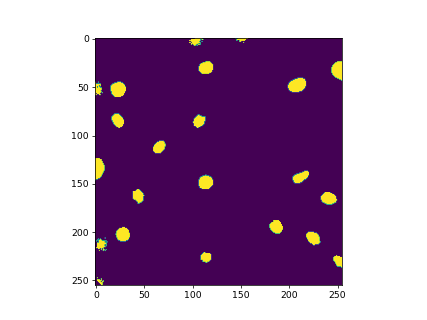

In [6]:
plt.figure()
plt.imshow(precip_mask)

In [7]:
precip_coords = np.asarray(np.where(precip_mask ==1)).T

In [8]:
from sklearn.cluster import DBSCAN

In [9]:
individual_precipitate_clustering = np.zeros_like(precip_mask)

In [10]:
individual_precipitate_clustering[np.where(precip_mask ==1)] = DBSCAN(1,min_samples = 1).fit_predict(precip_coords)+1

<IPython.core.display.Javascript object>


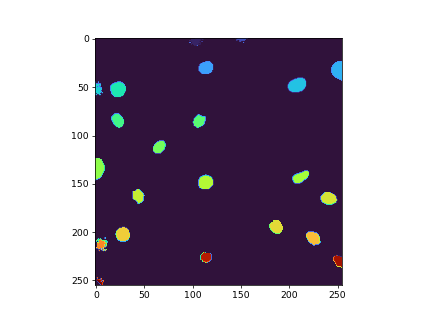

In [11]:
plt.figure()
plt.imshow(individual_precipitate_clustering, cmap = 'turbo')

To get the all patterns for one of these precipitates just hover over the figure and read the cluster label and then use the code below

example: cluster 20

In [13]:
clust_ind = 20

<IPython.core.display.Javascript object>


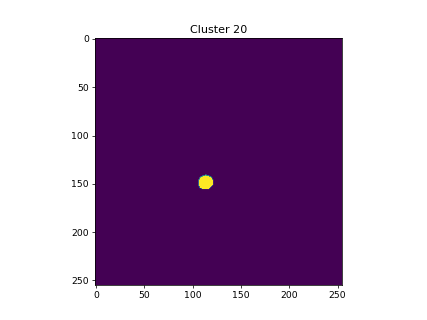

Text(0.5, 1.0, 'Cluster 20')

In [14]:
plt.figure()
plt.imshow(np.where(individual_precipitate_clustering==clust_ind, 1,0))
plt.title(f'Cluster {clust_ind}')

In [15]:
all_eg_patts = example_data.data[np.where(individual_precipitate_clustering ==clust_ind)]

Can view all the individual patterns

<IPython.core.display.Javascript object>


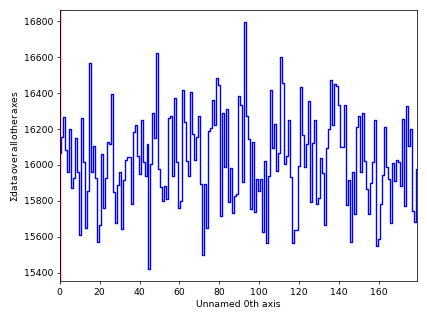

<IPython.core.display.Javascript object>


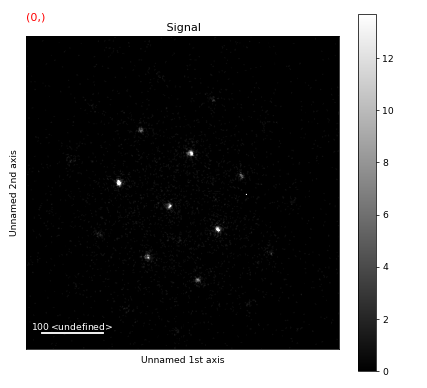

In [16]:
hs.signals.Signal2D(all_eg_patts).plot()

And the mean pattern

<IPython.core.display.Javascript object>


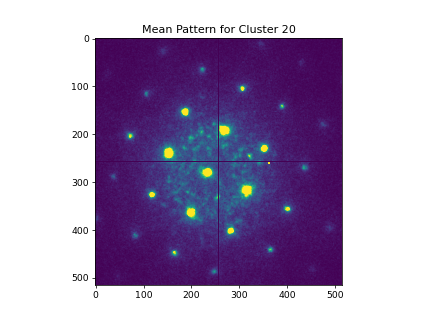

Text(0.5, 1.0, 'Mean Pattern for Cluster 20')

In [17]:
plt.figure()
plt.imshow(np.mean(all_eg_patts, axis = 0), vmax = 0.5)
plt.title(f'Mean Pattern for Cluster {clust_ind}')